# Machine Learning Workshop: Week 2

This week we will use our math knowledge to make some basic preparations to understand linear regression (next lecture). We will have a look at vectors, matrices, error functions, derivatives and finding the minimum of a function. 


Please read over the whole notebook. It contains several excercises (6) that you have to complete. 

# Vectors and Matrices in Python

We can create a vector by:

In [1]:
import numpy as np

a = np.array([1,0,2])
b = np.array([3,2,1])

A vector only has one dimension in python (its not directly treated as matrix). We can see that as the second dimension (calling shape) is left free

In [2]:
a.shape

(3,)

We can add vectors and compute the inner product with the dot function

In [3]:
c = a + b
d = a.dot(c)

d

10

A matrix is created by:

In [4]:
A = np.array([[2, 1, 3], [1, 1 ,2]])
B = np.array([[2, 1], [1, 2], [5 ,2]])

A.shape, B.shape

((2, 3), (3, 2))

where we have created a $2x3$ and a $3x2$ matrix

Or vectors can be stacked into matrices

In [5]:
X = np.column_stack((a, b))
Y = np.row_stack((a, b))

X,Y

(array([[1, 3],
        [0, 2],
        [2, 1]]), array([[1, 0, 2],
        [3, 2, 1]]))

We can add, transpose and multiply matrices

**Note:** When R is an m * n matrix and T is a p * q matrix, then R + T or R - T is only possible if m = p and n = q. R * T is only possible if n = p, and the result matrix will be an m * q matrix.

In [6]:
C = A + B.transpose()
D = C.dot(A.transpose()) # matrix product C * A

C,D

(array([[4, 2, 8],
        [2, 3, 4]]), array([[34, 22],
        [19, 13]]))

And we can multiply matrices with vectors

In [7]:
e = A.dot(a) # this corresponds to A * a
f = a.dot(B) # this corresponds to a^T * B, and there is no need to use the function transpose on a vector

e, f

(array([8, 5]), array([12,  5]))

The inverse of a matrix can be computed by

In [8]:
import numpy.linalg as linalg

AA = A.dot(A.transpose()) # A * A^T ... we can only invert quadratic matrices
AAinv = linalg.inv(AA)

AA, AAinv

(array([[14,  9],
        [ 9,  6]]), array([[ 2.        , -3.        ],
        [-3.        ,  4.66666667]]))

Multiplying with the inverse needs to result in the Identity matrix (from both sides)

In [9]:
AA.dot(AAinv), AAinv.dot(AA) 

(array([[1., 0.],
        [0., 1.]]), array([[1., 0.],
        [0., 1.]]))

**Note:** Computing the inverse of a matrix is tricky and it is hard to get a numerically accurate solution. Whenever we need to compute the inverse of a matrix times another matrix ($\boldsymbol{A}^{-1}\boldsymbol{B}$, then it is better to use specifically tailored methods for this which are numerically more stable. 

In [10]:
import numpy.linalg as linalg

b = np.array([1, 2])
out1 = linalg.solve(AA, b) # compute AA^-1 * b in a more stable way using linalg.solve

out1

array([-4.        ,  6.33333333])

## Exercise 1:
Compute: 
* $(\boldsymbol{A} \boldsymbol a - \boldsymbol b)^T(\boldsymbol A \boldsymbol a - \boldsymbol b)$, 
* $(\boldsymbol{C} \boldsymbol b)^T\boldsymbol C$
* $(\boldsymbol{C}^T \boldsymbol C)^{-1}\boldsymbol C^T \boldsymbol a$, 

where the matrices are defined below. Check your result also in terms of the dimensionalities of the resulting matrices. Thats an easy way of spotting an error. Always use the linalg.solve method instead of the linalg.inv method if possible. 

In [11]:
A = np.array([[1, 0, 1], [2, 3, 1]])
C = np.array([[1, 0], [2, 3], [1, 5]])
a = np.array([1, 2, 1])
b = np.array([2, 2])

temp = A.dot(a) - b # Aa - b
sol1 = temp.transpose().dot(temp)
sol2 = C.dot(b).transpose().dot(C)
sol3 = linalg.solve(C.transpose().dot(C), C.transpose().dot(a))

sol1, sol2, sol3

(49, array([34, 90]), array([ 1.00000000e+00, -5.88551965e-17]))

# Linear Regression in Matrix Form

<img src='regression.png'>
We want to find a linear function (line) that best fits the data

## Linear Functions in vector form

More formally, we want to fit a linear function of the following form:
    $$\hat y = \beta_0 + \sum_i \beta_i x_i $$
$\beta_0$ is the offset and $\beta_i$ defines the slope for the ith input.
We can also write the output $\hat{y}$ in vector form
$$\hat{y} = \beta_0  + \boldsymbol x^T\boldsymbol \beta = \tilde{\boldsymbol x}^T \tilde{\boldsymbol \beta}, \textrm{ with } \tilde{\boldsymbol \beta} = \left[\begin{array}{c}\beta_0 \\ \vdots \\ \beta_d \end{array} \right] \textrm{ and } \tilde{\boldsymbol x} = \left[\begin{array}{c}1 \\ x_1 \\ \vdots \\ x_d \end{array} \right]$$
Note that we prepended a one to the $\boldsymbol x$-vector which will multiply with the offset $\beta_0$ when computing the scalar product.

## Matrices for multiple samples

We will now consider multiple samples $\boldsymbol x_i$, where we will prepend again a $1$ to create the $\tilde{\boldsymbol x}_{i} = \left[\begin{array}{c}1 \\ x_{i,1} \\ \vdots \\ x_{i,d} \end{array} \right]$ 
 vector. We can stack all $\tilde{\boldsymbol x_{i}}$  in a matrix $\tilde{\boldsymbol X} = \left[\begin{array}{c}\tilde{\boldsymbol x}_{d}\\ \vdots \\ \tilde{\boldsymbol x}_{n}  \end{array} \right].$
The output $\hat y_i$ for each sample can also be  subsumed in a vector 
$\hat{\boldsymbol y} = \left[\begin{array}{c}\hat{y}_{1}\\ \vdots \\ \hat{ y}_{n}  \end{array} \right] = \left[\begin{array}{c} \tilde{\boldsymbol x_1}^T \tilde{\boldsymbol \beta} \\ \vdots \\ \tilde{\boldsymbol x_n}^T \tilde{\boldsymbol \beta}  \end{array} \right] = \tilde{\boldsymbol X} \tilde{\boldsymbol{\beta}}.$ Hence, the computation of all output values can be written as matrix vector product


## Lets do it in python...

We will consider a 1-dimensional problem as illustrated below. We are given 10 training samples and we want to fit
a line to these samples. Our line has 2 parameters, $\beta_0$ and $\beta_1$. Lets first look at the data and how we can compute a prediction using hand-picked 
$\beta_0$ and $\beta_1$ values. 

In [12]:
import pandas as pd
import matplotlib.pyplot

data_train = pd.read_csv('regression_train.csv', index_col = 0)
data_test = pd.read_csv('regression_test.csv', index_col = 0)

data_train

,x,y
0,0.507979,-2.885948
1,2.081478,-8.107921
2,-2.090953,-9.628462
3,0.108276,3.871277
4,3.929470,29.992393
5,3.962931,35.265511
6,-3.744147,-47.535566
7,-2.927571,-21.047461
8,-4.485328,-90.654904
9,-0.591902,-5.330597


### Get the training data as numpy arrays

In [13]:
x_train = data_train['x'].values
y_train = data_train['y'].values

x_test = data_test['x'].values
y_test = data_test['y'].values

x_train

array([ 0.50797903,  2.08147823, -2.09095261,  0.10827605,  3.92946954,
        3.96293089, -3.7441469 , -2.92757122, -4.48532797, -0.59190156])

### Plot the training data

<IPython.core.display.Javascript object>


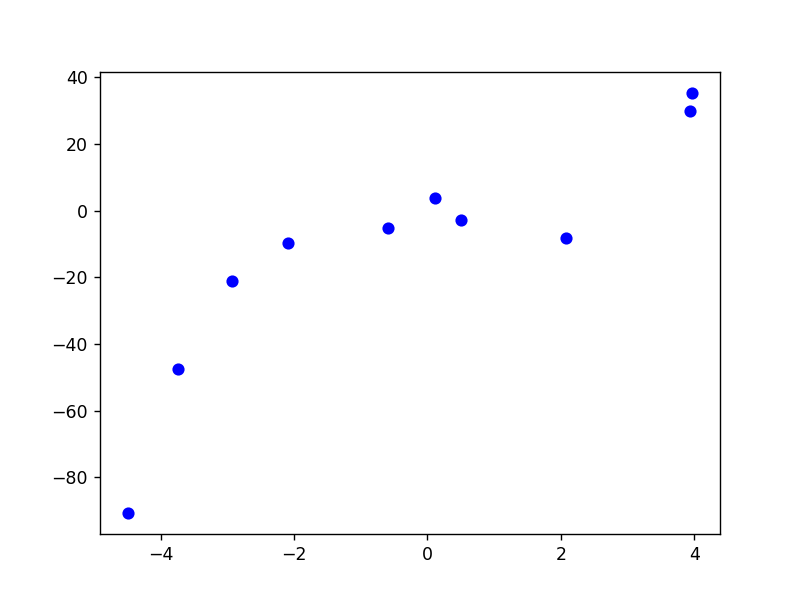

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt

# get input output vectors from the data frame and plot the data
plt.clf()
plt.plot(x_train,y_train, 'bo')
plt.savefig('trainingdata.png')
plt.show()

## Preparing the data matrix
As a first step, lets construct the $\tilde{\boldsymbol{X}}$ matrix 

In [15]:
Xtilde = np.column_stack((np.ones(x_train.shape), x_train))

Xtilde

array([[ 1.        ,  0.50797903],
       [ 1.        ,  2.08147823],
       [ 1.        , -2.09095261],
       [ 1.        ,  0.10827605],
       [ 1.        ,  3.92946954],
       [ 1.        ,  3.96293089],
       [ 1.        , -3.7441469 ],
       [ 1.        , -2.92757122],
       [ 1.        , -4.48532797],
       [ 1.        , -0.59190156]])

## Exercise 2 - Prediction with arbitrary betas.
We want to extend the plot now with the prediction for a hand-picked betas. 
* First, compute the data matrix Xtest_tilde for the test set (see code above how it is done for the training set).
* Reuse the plotting code from above, add the predicted line for $\beta_0 = 7$ and $\beta_1 = 8$ to the plot (use red line color, extend your legend)

<IPython.core.display.Javascript object>


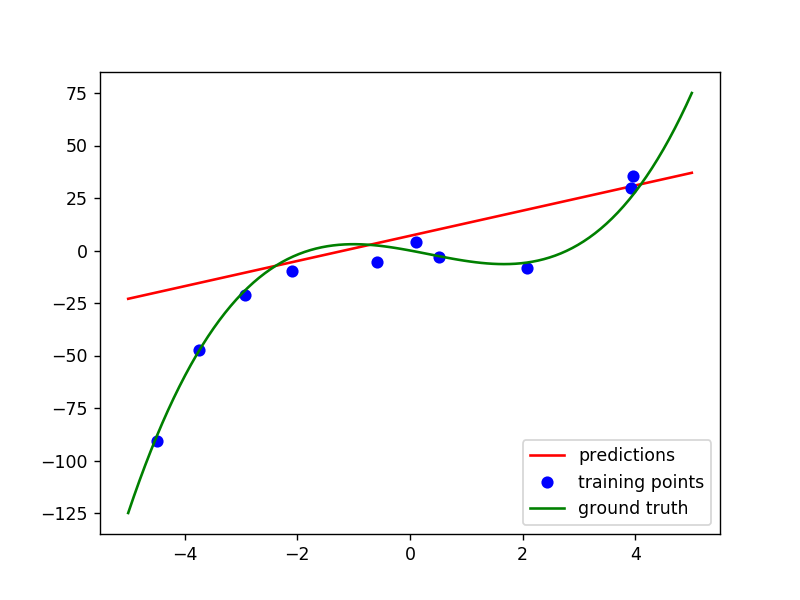

In [16]:
beta_0 = 7
beta_1 = 6
betatilde = np.array([beta_0, beta_1])

Xtest_tilde = np.column_stack((np.ones(x_test.shape), x_test))
ytest_hat = Xtest_tilde.dot(betatilde)

plt.figure()
plt.plot(x_test,ytest_hat, 'r')
plt.plot(x_train,y_train, 'bo')
plt.plot(x_test,y_test, 'g')
plt.legend(('predictions', 'training points', 'ground truth'), loc = 'lower right')
plt.savefig('regression_randomPrediction.png')

## Error computation
Well, not too bad but still a large error. We can do better. To assess the quality of our prediction, we compute the error as the difference to the training labels, i.e.,
$$\boldsymbol e = \left[\begin{array}{c}y_1 \\ \vdots \\ y_n  \end{array} \right] - \left[\begin{array}{c}\hat y_1 \\ \vdots \\ \hat y_n  \end{array} \right].$$


In [17]:
yhat = Xtilde.dot(betatilde)
error = y_train - yhat

error

array([-12.93382254, -27.59679041,  -4.08274586,  -3.77837898,
        -0.58442389,   4.48792548, -32.07068427, -10.48203321,
       -70.74293603,  -8.77918805])

The summed squared error can be computed by the scalar product of the error vector with itself, i.e.,
$$SSE = \boldsymbol{e}^T \boldsymbol{e} = \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

In [18]:
SSE = error.dot(error) # the scalar product is also implemented with the dot function (no need for transpose)

SSE

7200.333546172438

## Exercise 3 - The SSE error function

The SSE is a function of the $\tilde{\boldsymbol{\beta}}$ vector. We want to minimize the SSE, i.e., find the  
$\tilde{\boldsymbol{\beta}}$ with minimal summed squared error. In this excercise, you should visualize the error function by testing different $\beta_0$ and $\beta_1$ values and creating a 3D plot.

First, implement a function SSE that takes the betaTilde vector, the training input x and the training output y and computes the sum of squarred errors for the given betas.

In [19]:
def SSE(beta, x, y):
    
    Xtilde = np.column_stack((np.ones(x.shape), x))
    yhat = Xtilde.dot(beta)
    error = y - yhat
    SSE = error.dot(error)
    return SSE

We now compute the SSE for a grid from $-200$ to $200$, using $50$ grid values per dimension. I.e., in total we get 
$2500$ evaluations of the SSE function. If your SSE function has ben executed without errors correctly, you just have to execute the cell. 

In [20]:
import numpy as np

# specify data points for beta0 and beta1 (from - 200 to 200, using 50 uniformly distributed points)
beta0Array = np.linspace(-200, 200, 50)
beta1Array = np.linspace(-200, 200, 50)
SSEarray = np.zeros((50, 50))

for i in range(0, 50):
    for j in range(0, 50):
        beta = np.array([beta0Array[i], beta1Array[j]])
        SSEarray[i, j] =  SSE(beta, x_train, y_train)
        
SSEarray

array([[3797654.81867248, 3527364.37834186, 3268159.68916082, ...,
        3077701.11582943, 3328440.97952907, 3590266.5943783 ],
       [3778174.51348283, 3507450.95141711, 3247813.14050098, ...,
        3037864.08909039, 3288170.83105495, 3549563.32416908],
       [3760026.98630233, 3488870.30250152, 3228799.3698503 , ...,
        2999359.84036052, 3249233.46058998, 3510192.83196902],
       ...,
       [4322813.50266366, 4032166.34078366, 3752604.93005324, ...,
        2646093.88699978, 2876477.02915004, 3117945.92244989],
       [4365973.76390466, 4074893.48028957, 3794898.94782405, ...,
        2668897.4266914 , 2898847.44710657, 3139883.21867132],
       [4410466.80315482, 4118953.39780463, 3838525.74360402, ...,
        2693033.74439218, 2922550.64307226, 3163153.29290192]])

The cell ouputs the SSE for every grid position between -200 and 200 for both dimensions. For a better visualization, we can create a 3D plot. Run the following cell for doing so.

<IPython.core.display.Javascript object>


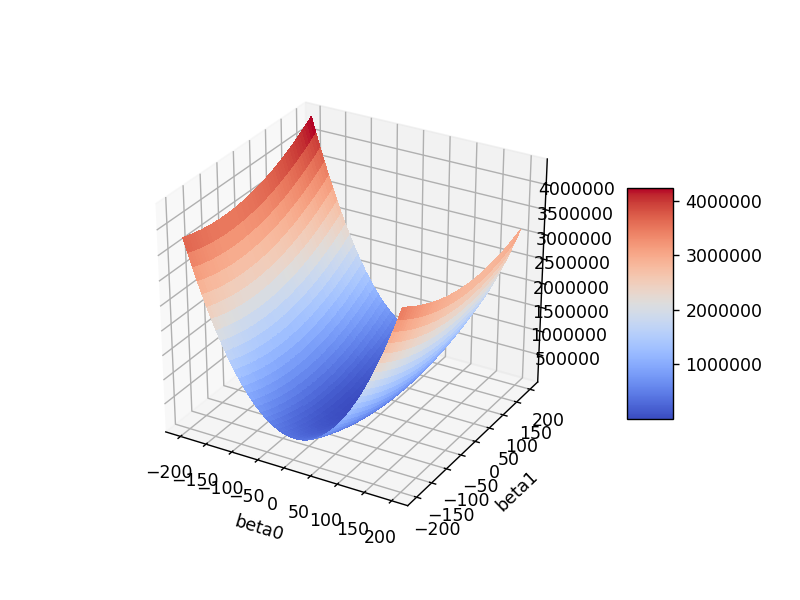

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection = '3d')

beta0Grid, beta1Grid = np.meshgrid(beta0Array, beta1Array)

surf = ax.plot_surface(beta0Grid, beta1Grid, SSEarray, cmap = cm.coolwarm, linewidth = 0, antialiased = False) # plot the surface

fig.colorbar(surf, shrink = 0.5, aspect = 5) # add a color bar which maps values to colors
plt.xlabel('beta0')
plt.ylabel('beta1')
plt.savefig('errorfunction.png')
plt.show()

## Minimization of the SSE
We have seen that we need to minimize a quadratic function that depends on 2 or more parameters ($\beta_0$ to $\beta_d$). We could now take the best $\boldsymbol \beta$ values that you have seen on the grid. However, this is highly inefficient for high-dimensional problems and also inaccurate. In order to do this minimization properly, we first have to talk about derivatives and vector derivatives. 

We can now compute the optimal beta values on our grid

In [22]:
minIndex = np.argmin(SSEarray)
index1, index2 = np.unravel_index(minIndex, (50, 50))
beta0 = beta0Array[index1]
beta1 = beta1Array[index2]

beta0, beta1

(-4.081632653061206, 12.244897959183675)

### Exercise 4 - Plot the line
Using the found beta values from before, plot the resulting line in a similar plot as for excercise 2 and compute the SSE. Is it better then our hand-picked value?

<IPython.core.display.Javascript object>


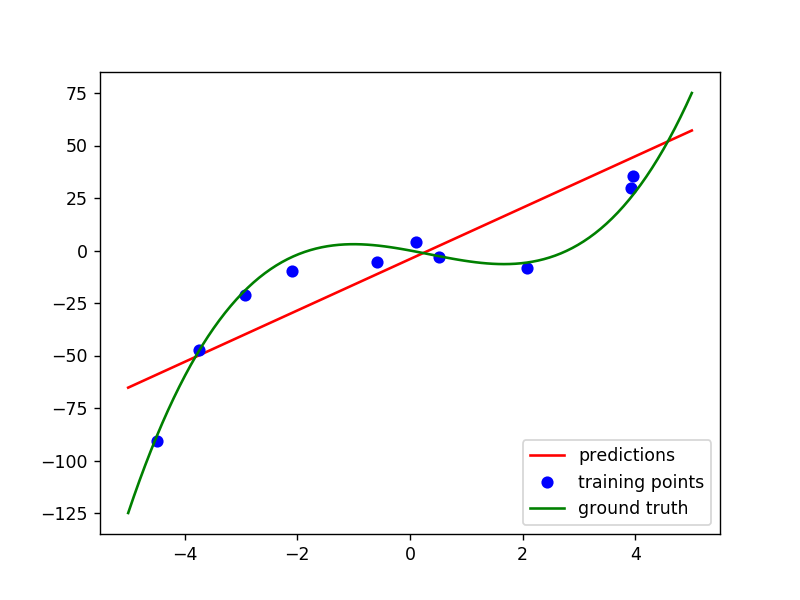

In [23]:
beta_0 = -4.0816326
beta_1 = 12.2448979
betatilde = np.array([beta_0, beta_1])

Xtest_tilde = np.column_stack((np.ones(x_test.shape), x_test))
ytest_hat = Xtest_tilde.dot(betatilde)

plt.figure()
plt.plot(x_test,ytest_hat, 'r')
plt.plot(x_train,y_train, 'bo')
plt.plot(x_test,y_test, 'g')
plt.legend(('predictions', 'training points', 'ground truth'), loc = 'lower right')
plt.savefig('regression_randomPrediction.png')

# Derivatives

**Definition:** “The derivative of a function of a real variable measures the sensitivity to change of a quantity (a function value or dependent variable) which is determined by another quantity (the independent variable)”. 
<img src="derivative.png">

## Derivative Rules

In order to computer a derivative $\partial f(x) / \partial x $ of a function $f(x)$, we can use the following rules:
* **Constants**:
$$ \frac{\partial a}{\partial x} = 0$$ 
* **Linear term:** 
$$ \frac{\partial ax}{\partial x} = a$$
* **Quadratic terms**:
$$ \frac{\partial x^2}{\partial x} = 2x$$


## Derivative Rules cont.

* **Linearity**:
$$ \frac{\partial a\cdot f(x) + b \cdot g(x)}{\partial x} = a\frac{\partial  f(x)}{\partial x} + b \frac{\partial g(x)}{\partial x}$$
* **Chain Rule**: For a composition of functions, i.e., $y = f(g(x))$, we can introduce an auxiliary variable $u = g(x)$. The derivative of  $$y = f(g(x))$$ is then given by
$$ \frac{\partial f(g(x)) }{\partial x} = \frac{\partial  f(u)}{\partial u} \frac{\partial u}{\partial x},$$
i.e. we have to multiply the derivative of $f$ with the deriviative of $u = g(x)$. 


## Example

Compute the derivative of $h(x) = 2 (x ^2 - 4)^2$. This function can be decomposed in $f(u) = 2 u^2$ and $u=g(x) = x^2 -4$, with $h(x) = f(g(x))$.

* Compute derivative of $f$: $$ \frac{\partial  f(u)}{\partial u} = \frac{\partial  (2 u^2)}{\partial u}= 4 u.$$
* Compute derivative of $u$: $$ \frac{\partial  u}{\partial x} = \frac{\partial  (x^2 - 4)}{\partial x} = 2x.$$
* Final Result:
$$ \frac{\partial f(g(x)) }{\partial x} = \frac{\partial  f(u)}{\partial u} \frac{\partial u}{\partial x} = 4 u \cdot 2 x = 8 \underbrace{(x^2 - 4)}_u x$$

### Example in Python

In [24]:
# define the function and its derivative
def h(x):
    return 2 * (x ** 2 - 4) ** 2

def hd(x):
    return 8 * (x ** 2 - 4) * x

<IPython.core.display.Javascript object>


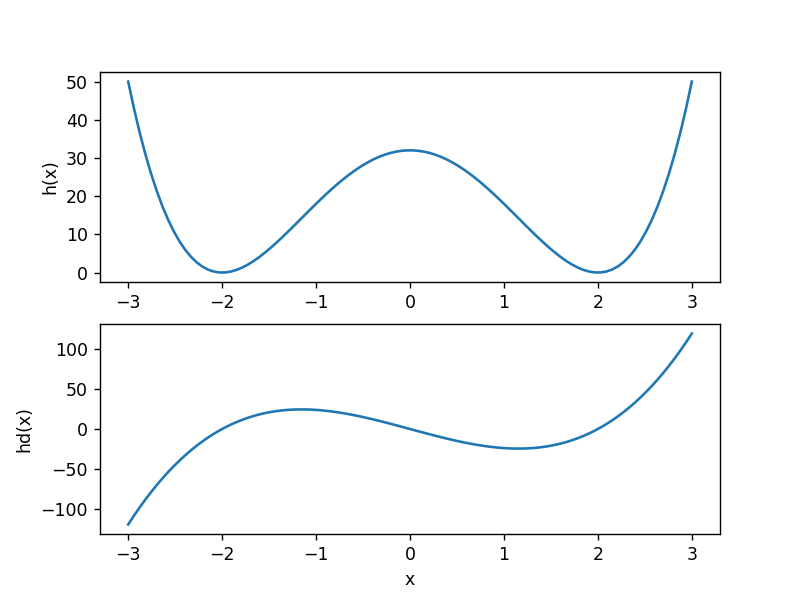

In [25]:
# plot it
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
x = np.linspace(-3, 3, num=100)
plt.subplot(2, 1, 1)
plt.plot(x, h(x))
plt.ylabel('h(x)')
plt.subplot(2, 1, 2)
plt.plot(x, hd(x))
plt.xlabel('x')
plt.ylabel('hd(x)')
plt.savefig('function_derivatives.png')

We can see that the function has 3 extrema (2 minima and 1 maximum), which occur when its derivative is 0 (-2, 0, 2)

We can use Gradient Descent algoithm to find a minimum or a maximum of this function. Now write your code to find a minimum using Gradient Descent algorithm.

In [26]:
import matplotlib.pyplot as plt
import numpy as np

x_old = np.random.randn()
x_new = np.random.randn()
epsilon = 0.00001
alpha = 0.01

def h(x):
    return 2 * (x ** 2 - 4) ** 2
def hd(x):
    return 8 * (x ** 2 - 4) * x

# save the states
states = []

while abs(x_new-x_old) > epsilon:    
    # update
    x_old = x_new
    x_new = x_old - alpha * hd(x_old)
    
    states.append([x_new,h(x_new)]) # for monitoring purpose
    print('x_new = {}'.format(x_new))
    
print('Local minimum occurs at {}'.format(x_new))

x_new = -0.15416397383690894
x_new = -0.20320333003776422
x_new = -0.26755714850833395
x_new = -0.3516431506314039
x_new = -0.4606904230546809
x_new = -0.6002893633355277
x_new = -0.7750769465514846
x_new = -0.9858517265012632
x_new = -1.2246720495159613
x_new = -1.4696239351105702
x_new = -1.6859767377242343
x_new = -1.8420958151575162
x_new = -1.9315012735380903
x_new = -1.9731139743166433
x_new = -1.9899756135161206
x_new = -1.9963430670568059
x_new = -1.9986770889367251
x_new = -1.9995229121574714
x_new = -1.9998281391312285
x_new = -1.9999381159102925
x_new = -1.9999777198894968
x_new = -1.999991978921946
x_new = -1.9999971123810185
Local minimum occurs at -1.9999971123810185


## Exercise 5: Derivatives

Compute the derivative of $v(x) = (x  + 4)^2 + 3 x^2 - (x - 1)^2$. Plot the function and its derivative!

<IPython.core.display.Javascript object>


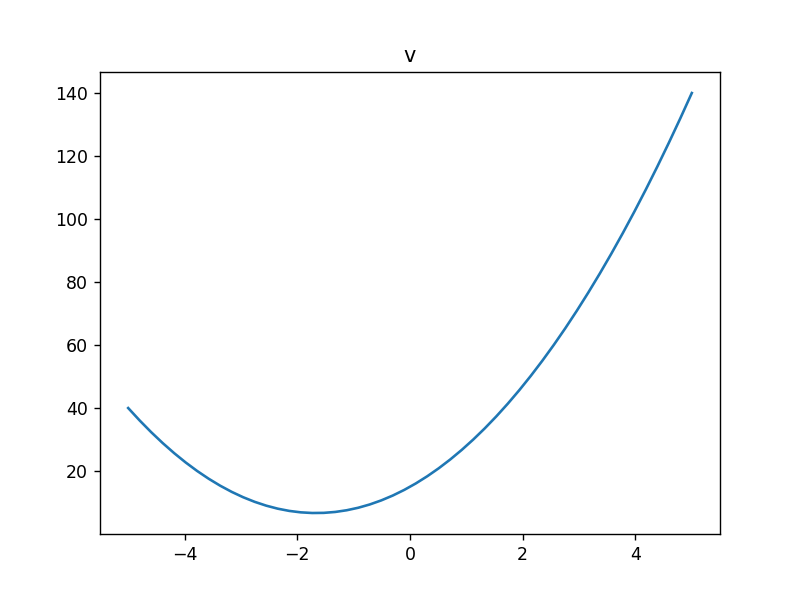

<IPython.core.display.Javascript object>


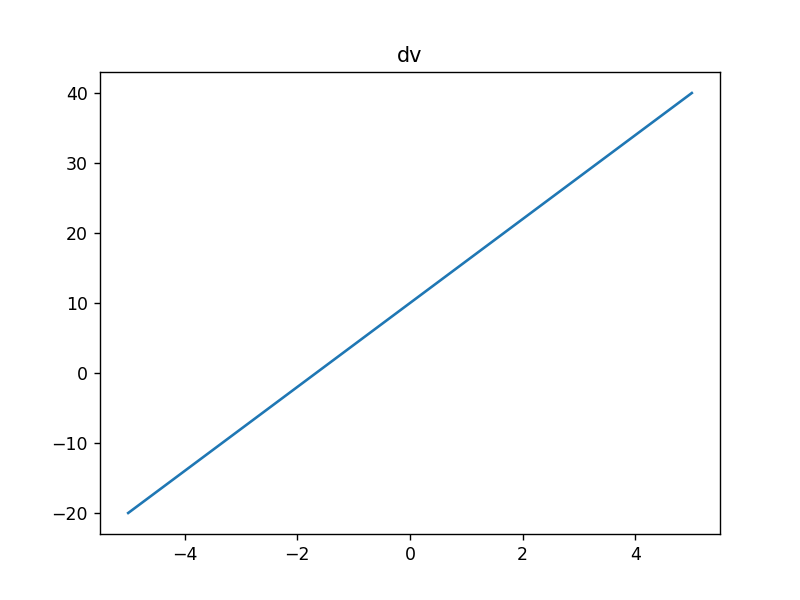

Text(0.5, 1.0, 'dv')

In [27]:
x = np.linspace(-5,5)

v = (x + 4) ** 2 + 3 * x ** 2 - (x - 1) ** 2
dv = 2 * (x + 4) + 6 * x - 2 * (x - 1)

plt.figure()
plt.plot(x, v)
plt.title('v')

plt.figure()
plt.plot(x, dv)
plt.title('dv')

# Computing the minima of a function

We have seen that a function has an extremum of a function occurs when its derivative is 0. For certain types of functions, i.e.,
quadratic functions, we can directly compute where the extrenum (i.e. max or minimum) is. Note that this only works if the function is convex,
i.e., there is only one maximum or minimum.

** Example: ** We want to compute the minimum of the following function: $f(x) = 2 x^2 - 2x + 1$ 
* **Derivative:** 
$$\frac{\partial f(x)}{\partial x} = 4x - 2 $$
* **Compute minimum:**
\begin{align*} \frac{\partial f(x)}{\partial x} = &0 \\
4 x - 2 = &0 \\
x  = & \frac{1}{2}
\end{align*}

### Lets confirm that with a plot...

In [28]:
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


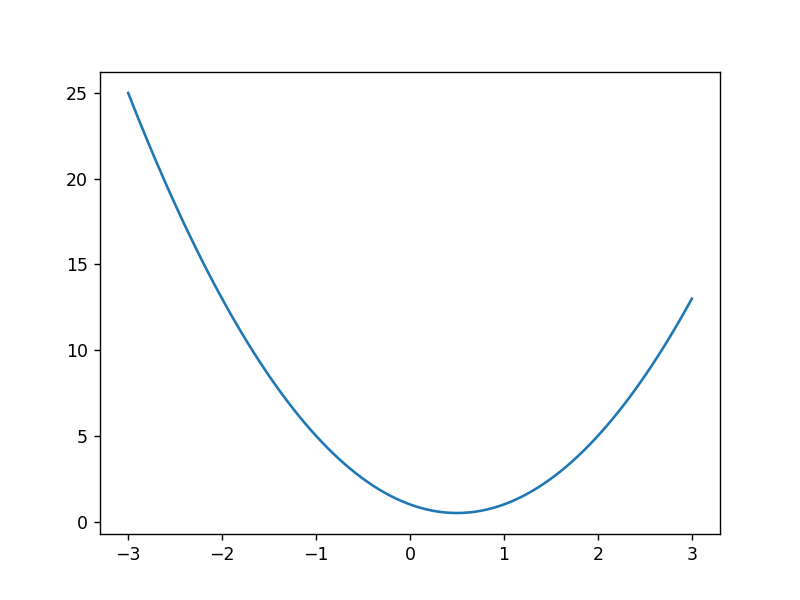

In [29]:
x = np.linspace(-3, 3, num=100)
plt.figure()
plt.plot(x, 2 * x ** 2 - 2 * x + 1)
plt.savefig('function_minimum.png')

## Exercise 6: Computing the minimum

Compute the minimum of the function defined in excercise 5. Confirm your result in the plot from  excercise 5.